<a href="https://colab.research.google.com/github/haithemml/Machine-Learning-with-Python/blob/master/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drive/MyDrive/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


We create a new dataframe  by taking an existing data and dropping column

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#data outcome 
x = data.drop('diagnosis', axis=1)

In [7]:
#np.ravel() will flatten that to an array
y = np.ravel(data['diagnosis'])

train the model and  make predictions  based on that trained model

In [8]:
#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)


calculates the value :  (**x** - **µ**) /**J** where **µ** is the mean and **J** is the standard deviation .
makes large numbers small.

In [9]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit((x_train))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# using support vector machine
from sklearn.svm import SVC
svc = SVC()
#training it
svc.fit(x_train, y_train)

SVC()

In [11]:
SVC(C=1.0, cache_size=300, class_weight=None, coef0=0.0, decision_function_shape='ovr',
    degree=3, gamma='auto_deprecated', kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

SVC(cache_size=300, gamma='auto_deprecated')

In [12]:
#use the test data to create predictions
y_predict = svc.predict(x_test)
#show how accurate those predictions are by creating what is called  a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Symptoms', 'Not Symptoms'], columns =['Predicted Cancer Symptoms', 'Predicted Healthy'])


In [13]:
confusion

,Predicted Cancer Symptoms,Predicted Healthy
Symptoms,36,6
Not Symptoms,3,69


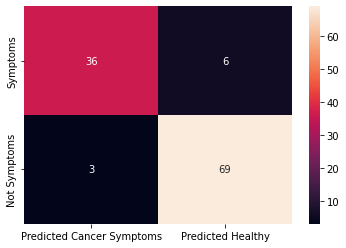

In [15]:
#Symptoms(diagnosis = 1) True positive. Patient was not Symptoms , but model  claim patient was Breast Cancer Symptoms
#Not Symptoms (diagnosis = 0) False positive. Patient was not Symptoms, but model claim patient was Breast Cancer Symptoms
#True negative, Patient not symptoms and model predicted that.
sns.heatmap(confusion, annot=True, fmt='d')


In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.92      0.96      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



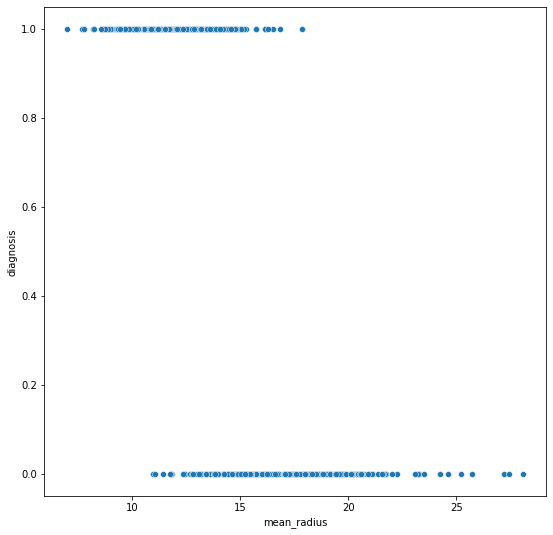

In [25]:
sns.scatterplot(data=data, x='mean_radius', y='diagnosis')

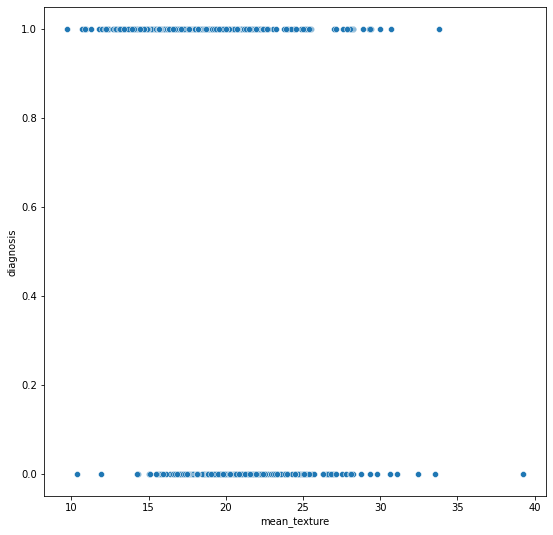

In [26]:
sns.scatterplot(data=data, x='mean_texture', y='diagnosis')

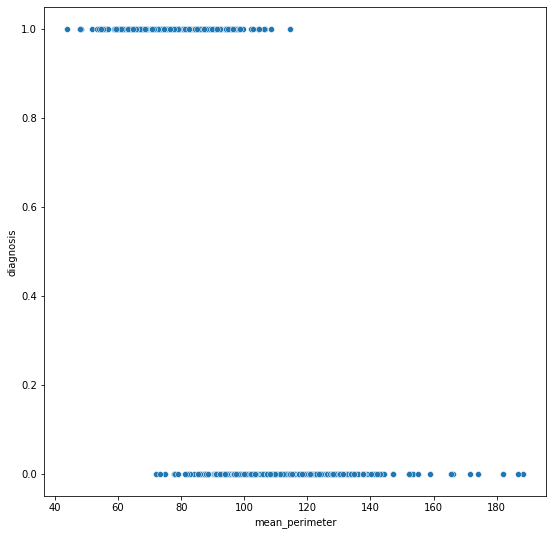

In [27]:
sns.scatterplot(data=data, x='mean_perimeter', y='diagnosis')

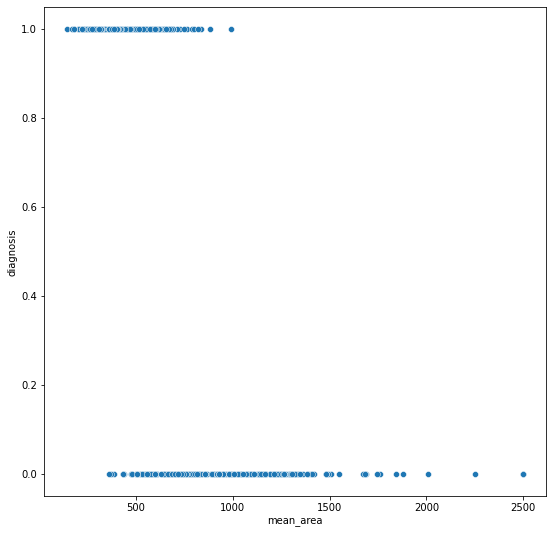

In [28]:
sns.scatterplot(data=data, x='mean_area', y='diagnosis')

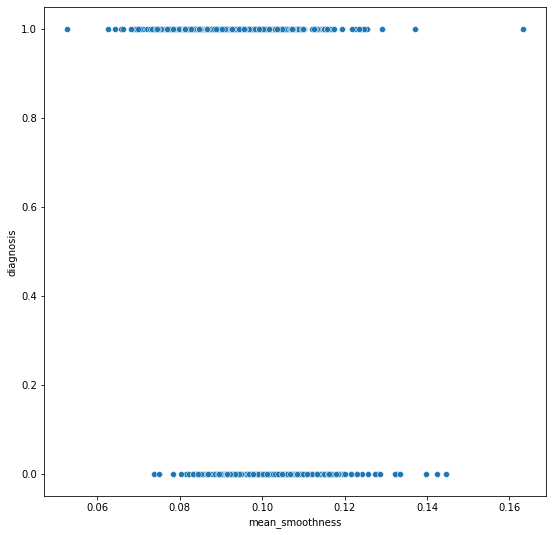

In [29]:
sns.scatterplot(data=data, x='mean_smoothness', y='diagnosis')